<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ideas" data-toc-modified-id="Ideas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ideas</a></span></li><li><span><a href="#1.-Import-libary-and-load-data" data-toc-modified-id="1.-Import-libary-and-load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1. Import libary and load data</a></span></li><li><span><a href="#Explore-PM2.5-pattern" data-toc-modified-id="Explore-PM2.5-pattern-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore PM<sub>2.5</sub> pattern</a></span><ul class="toc-item"><li><span><a href="#Background-on-PM2.5-pollutant" data-toc-modified-id="Background-on-PM2.5-pollutant-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Background on PM<sub>2.5</sub> pollutant</a></span><ul class="toc-item"><li><span><a href="#Before-diving-into-PM2.5-pattern,-somethings-about-this-pollutant-I-should-point-out:" data-toc-modified-id="Before-diving-into-PM2.5-pattern,-somethings-about-this-pollutant-I-should-point-out:-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Before diving into PM<sub>2.5</sub> pattern, somethings about this pollutant I should point out:</a></span></li><li><span><a href="#Because-PM2.5-is-formed-as-garbage-collector,-it-is-anticipated-to-be-a-mix-results" data-toc-modified-id="Because-PM2.5-is-formed-as-garbage-collector,-it-is-anticipated-to-be-a-mix-results-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Because PM<sub>2.5</sub> is formed as <em>garbage collector</em>, it is anticipated to be a mix results</a></span></li><li><span><a href="#Essentially,-we-need-to-form-some-questions-such-as:" data-toc-modified-id="Essentially,-we-need-to-form-some-questions-such-as:-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Essentially, we need to form some questions such as:</a></span></li><li><span><a href="#Game-plan" data-toc-modified-id="Game-plan-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Game plan</a></span></li></ul></li><li><span><a href="#Is-PM2.5-changed-with-traffic-peaks-(during-the-day)?" data-toc-modified-id="Is-PM2.5-changed-with-traffic-peaks-(during-the-day)?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Is PM<sub>2.5</sub> changed with traffic peaks (during the day)?</a></span></li><li><span><a href="#Is-PM2.5-changed-in-weekdays-vs.-weekends?" data-toc-modified-id="Is-PM2.5-changed-in-weekdays-vs.-weekends?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Is PM<sub>2.5</sub> changed in weekdays vs. weekends?</a></span></li><li><span><a href="#3.-What-did-PM2.5-change-with-month-in-2018?" data-toc-modified-id="3.-What-did-PM2.5-change-with-month-in-2018?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>3. What did PM<sub>2.5</sub> change with month in 2018?</a></span></li></ul></li><li><span><a href="#Concluding-notes" data-toc-modified-id="Concluding-notes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Concluding notes</a></span></li></ul></div>

<a id='idea'></a>
# Ideas

- In [previous exercise](https://github.com/binh-bk/air-quality-analysis/blob/master/1.%20Basic-data-visualize.ipynb), the PM<sub>2.5</sub> concentration changed during the day without a clear pattern, 
- Let examine closer the value and trend of PM<sub>2.5</sub> in this exercise, mainly based on timestamp
- Timestamp comes with the concentration values are a neat dataset for us to practice with code and find out some insights on the pattern of PM<sub>2.5</sub>.


# 1. Import libary and load data

In [93]:
import pandas as pd
import datetime
# import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] =  (15,5)
plt.rcParams['font.sans-serif'] = 'Open Sans'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#4c4c4c'
plt.rcParams['axes.labelcolor']= '#4c4c4c'
plt.rcParams['xtick.color'] = '#4c4c4c'
plt.rcParams['ytick.color'] = '#4c4c4c'
plt.rcParams['font.size']=12

In [94]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.3)
plt.style.use('seaborn-v0_8-whitegrid')

In [95]:
df = pd.read_csv('data/cleaned_Hanoi_PM2.5_2018_YTD.csv',
                parse_dates=['Date (LT)'],
                index_col = ['Date (LT)'])
df.head()

,NowCast Conc.,AQI,AQI Category,Raw Conc.,QC Name
Date (LT),,,,,
2018-01-01 01:00:00,68.9,158,Unhealthy,69.2,Valid
2018-01-01 02:00:00,72.2,160,Unhealthy,75.5,Valid
2018-01-01 03:00:00,81.2,164,Unhealthy,90.2,Valid
2018-01-01 04:00:00,89.4,169,Unhealthy,97.6,Valid
2018-01-01 05:00:00,89.2,168,Unhealthy,89.1,Valid


In [96]:
# let trim down the csv file and now contain two column, one for date, another for PM2.5 Raw Conc.
dft = df[['Raw Conc.']]
dft.columns = ['pm25']
dft.head(3)

,pm25
Date (LT),
2018-01-01 01:00:00,69.2
2018-01-01 02:00:00,75.5
2018-01-01 03:00:00,90.2


In [97]:
# and save to to dat folder
dft.to_csv('data/cleaned_pm25_Hanoi_PM2.5_2018_YTD.csv')

In [98]:
# and load file again (in case you need to do so)
df = pd.read_csv('data/cleaned_pm25_Hanoi_PM2.5_2018_YTD.csv',
                parse_dates=['Date (LT)'],
                index_col = ['Date (LT)'])
df.head()

,pm25
Date (LT),
2018-01-01 01:00:00,69.2
2018-01-01 02:00:00,75.5
2018-01-01 03:00:00,90.2
2018-01-01 04:00:00,97.6
2018-01-01 05:00:00,89.1


<Axes: xlabel='Date (LT)'>

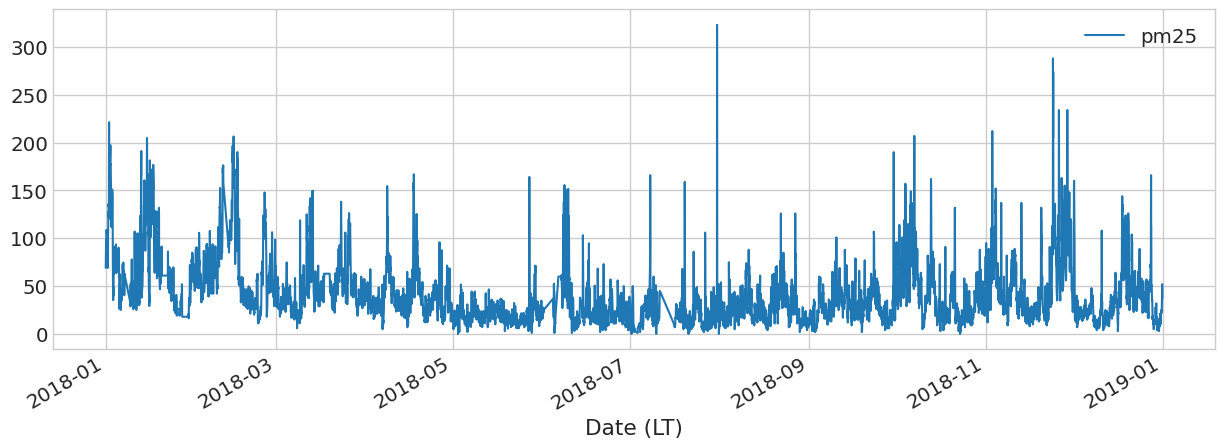

In [99]:
# the DataFrame only has one column (pm25), so that plot command is much simpler
# the overall patterns are peaks and values over days-to-week period. 
# we will try to find the nudget from this file
df.plot(kind='line')

# Explore PM<sub>2.5</sub> pattern

## Background on PM<sub>2.5</sub> pollutant
    
### Before diving into PM<sub>2.5</sub> pattern, somethings about this pollutant I should point out:

1. It is not really **one** pollutant but as a collection of suspended particles and aerosols in the air with a diameter of 2.5&mu;m or less. Think PM<sub>2.5</sub> as a bag-full items rather one individual substance. PM<sub>2.5</sub> is similar to PM<sub>10</sub> in this aspect, and different from other gaseous pollutants such as carbon mono-dioxide (CO), nitrous dioxide  (NO<sub>2</sub>), sulfur dioxide (SO<sub>2</sub>), and ozone (O<sub>3</sub>). 

2. Gaseous pollutants are more directly tied to a process for example:
    - CO is attributed by imcompletion burning of carbonacious materials such as biomass, fossil fuels
    - NO<sub>2</sub> is associated with a high-temperature combustion like in internal engines
    - SO<sub>2</sub> is originated from burning sulfur, mostly in coals, but in liquid fuels as well. **Sour** crude oil is named for a high-content sulfur one. Those high-quality crudes are low sulfur and  low-acid content so call **sweet** crudes.
    
3. So where does the PM<sub>2.5</sub> come from?:
    - primary via combination and aggregation of carbon element, carbonaous materials, metals, vapor water
    - secondary via salts of ammonia, nitrate, sulfate
    - if you like cake, then SANDWICH (**S**ulfate, **S**djusted **N**itrate, **D**erived **W**ater, **I**nferred **C**arbon **H**ybrid) is a short-hand for PM<sub>2.5</sub> composition ([ref](https://www3.epa.gov/ttnamti1/files/2006conference/frank.pdf))
    - so PM<sub>2.5</sub> is a box-full of cookies with variety of chocolate chips, sprinkles, nuts, what have you,

### Because PM<sub>2.5</sub> is formed as *garbage collector*, it is anticipated to be a mix results 

- **emission source**: 

    - transportation (gasoline engine + diesel engine)
    - domestic cooking (bee-hive stove is a popular option to get heat from a low-quality coal but Hanoi. Hanoi is phasing it out)
    - small boilers and recycle clusters. Surrounded Hanoi from 20-40 km, there are a few dozens of craft villages that mostly recycles metal, plastic, anything else that deems valued. Non-recycles are burned
    - large industrial facilities: such as coal-fired plants, and cement production, some fertile and chemical manufacture
    - ammonia such as from fertile, husbandary, (human) domestic waste
    - secondary gaseous source such as nitrous oxide, sulfur oxide
    - waste incineration (such as street leaves), and biomass burning (seasonally) 
    
- **transport**:

    - horizonal transport: wind sweeps out or brings in PM<sub>2.5</sub> or its predecessors from/to nearby location
    - vertial transport: temperature difference making air density changed. Hot pockets of air near the surface rise while cold pockets sinked
    - this is considered as **dilution**
    - with temperature, available water vapor changed leads to change in water composition of PM<sub>2.5</sub> and change the size of particles. So we have a *train window* (or a bin) called PM<sub>2.5</sub> that captures (by sensors/ other intruments) to tell what level of PM<sub>2.5</sub>, and sometimes it tells a lower value of PM<sub>2.5</sub> in late afternoons because a portion of particles slided out that *window* from their shink in size
    - the lower end of size for PM<sub>2.5</sub> is 0.1 &mu;m, most low-cost sensors has a smaller end is 0.3 &mu;m (with ~50% of confidence in reading).
    - some reports indicated 0.44 &mu;m is the average diameter, other sensors such as Sensirion SPS30 provides typical particle size (around 0.5-0.6&mu;m). It was not clear this *typical* size is based on the *number* of particles or *weight* of the particles
    
- **reaction**:

    - photo-chemical reaction could induce more nitrogen dioxide in the summer while a high temperature creates a stronger vertial mixing of air 
    - strong radiation is likely to promote oxidation of carbonacious and carbon element
    - **wet removal** like with heavy rain and saturated humidity are effective to aggregate suspended particles to the size that it can be settled down and precipated with rain

### Essentially, we need to form some questions such as:
    
1. Is PM<sub>2.5</sub> changed with traffic peaks (during the day?)
2. Is PM<sub>2.5</sub> changed in weekdays vs. weekends?
3. What did PM<sub>2.5</sub> change with month in 2018?

### Game plan

- **question 1**:
    - cut data to each day, select peak hours (7,8, 18,19), and non-peak hours (the rest)
    - calculate the ratio of peak hours to non-peak hours each day,
    - take the mean and standard deviation of the whole year

- **question 2**:
    - similar to question 1, the data is cut into weekdays, and weekends
    - take the ratio
    - sum up for the whole year

- **question 3**:
    - cut data into month, present them with different forms with mean, medium and standard deviation

## Is PM<sub>2.5</sub> changed with traffic peaks (during the day)?

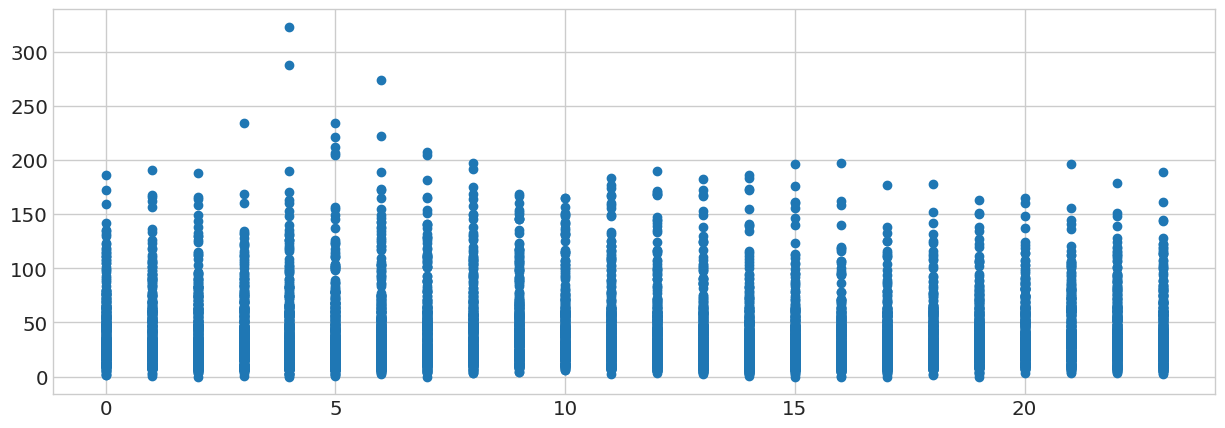

In [100]:
# a quick look on PM2.5 by hours
plt.scatter(df.index.hour, df.pm25);

In [101]:
# Let cut the DataFrame by each day
dft = [group[1] for group in df.groupby(df.index.date)]

**What has happened?**

- use `groupby` by `day` using attribute `df.index.date` 
- take the second element `group[1]` in the tupple created by each `groupby`
- run through DataFrame using **list comprehension** such as `[perform_on_each_element for element in a_collection]`

In [102]:
# here is data of one day look like
data = dft[1] #the second element in the list
data

,pm25
Date (LT),
2018-01-02 00:00:00,122.4
2018-01-02 01:00:00,135.9
2018-01-02 02:00:00,133.0
2018-01-02 03:00:00,134.1
2018-01-02 04:00:00,139.9
2018-01-02 05:00:00,221.3
2018-01-02 06:00:00,171.9
2018-01-02 07:00:00,140.6
2018-01-02 08:00:00,132.4


In [103]:
# define peak hours. PM2.5 reported with the timestamp of the end of period, so at PM2.5 at 9AM is measured from 8-9
peak_hours = [8,9, 18,19]
offpeak = data.groupby(data.index.hour).filter(lambda ele: ele.index.hour not in peak_hours)
onpeak = data.groupby(data.index.hour).filter(lambda ele: ele.index.hour in peak_hours)

**What has happened?**

- use `groupby` by `day` using attribute `df.index.hour` of data each day 
- `filter` data of each hour by checking if the `hour` attribute is (or is not) in the list defined for **peak_hours**
- What is about this `lambda` keywork. It defines a (anonymous function, through away, oneline) function. It took a data point, and the function was a comparision if attribute `hour` is in the **peak_hours** list

In [104]:
# also let make sure that the collect of onpeak or offpeak should have 50% or more entries
offpeak.isnull().sum().pm25 # zero mean no null entry

np.int64(0)

In [105]:
# or condition to yeild a boolean outcome
offpeak.isnull().sum().pm25 < 10 # must have less than 10 null (emptry) entries 

np.True_

In [106]:
# here the nudget comes!
ratio = onpeak.mean()/offpeak.mean()
ratio

pm25    0.988326
dtype: float64

In [107]:
# and the value for PM2.5
ratio.pm25

np.float64(0.9883256037102189)

In [108]:
# and to carry out the operation over a few hundred instance, to make a function for it
def cal_ratio(data): 
    peak_hours = [8,9, 18,19]
    offpeak = data.groupby(data.index.hour).filter(lambda ele: ele.index.hour not in peak_hours)
    onpeak = data.groupby(data.index.hour).filter(lambda ele: ele.index.hour in peak_hours)
    date_ = data.index[0]
    if offpeak.isnull().sum().pm25 <10 and onpeak.isnull().sum().pm25 <2:
        doy = data.index[0].dayofyear
        ratio = onpeak.mean()/offpeak.mean()   
        output = {'date': date_, 'ratio': ratio.pm25}
    else:
        output = {'date': date_, 'ratio': 0}

    return output

In [109]:
# test out with the fifth element (day 5th of the year)
cal_ratio(dft[5]) # it works

{'date': Timestamp('2018-01-06 00:00:00'),
 'ratio': np.float64(1.0231641791044774)}

In [110]:
# here we work through each day of the year, and yield the output to a list name ratios
ratios = list()
for i, data in enumerate(dft):
    try:
        ratios.append(cal_ratio(data))
    except Exception as e:
        print(data)
        print(i,e)
        continue

                      pm25
Date (LT)                 
2018-03-11 00:00:00   45.1
2018-03-11 01:00:00   47.8
2018-03-11 03:00:00   43.0
2018-03-11 03:00:00   44.1
2018-03-11 04:00:00   47.8
2018-03-11 05:00:00   42.9
2018-03-11 06:00:00   41.1
2018-03-11 07:00:00   45.8
2018-03-11 08:00:00   69.6
2018-03-11 09:00:00   88.2
2018-03-11 10:00:00   95.0
2018-03-11 11:00:00  125.0
2018-03-11 12:00:00   98.9
2018-03-11 13:00:00   97.1
2018-03-11 14:00:00   99.8
2018-03-11 15:00:00   95.9
2018-03-11 16:00:00   93.5
2018-03-11 17:00:00   79.3
2018-03-11 18:00:00   61.4
2018-03-11 19:00:00   44.7
2018-03-11 20:00:00   38.9
2018-03-11 21:00:00   38.1
2018-03-11 22:00:00   41.7
2018-03-11 23:00:00   62.9
67 The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


**What has happened?**

- instead of using **list comprehension**, I came back to a good-old **for loop**, 
- `Python` has `enumerate` function that yield a tuple with *index, value*
- I put in a **try except** block, so that during the run, if an error would occur, the **except** part will catch it, and print it out. We have one instance in this run. Those without exception has the result apppended to the list named **ratios**

In [111]:
# let check out the result 
ratios[0]

{'date': Timestamp('2018-01-01 01:00:00'),
 'ratio': np.float64(1.0144656423145024)}

In [112]:
# DataFrame (DF) is good, how turn the list of dictionary (that what ratios is) to a DF
dfr = pd.DataFrame.from_dict(ratios)
dfr.head()

,date,ratio
0,2018-01-01 01:00:00,1.014466
1,2018-01-02 00:00:00,0.988326
2,2018-01-03 00:00:00,1.141972
3,2018-01-04 00:00:00,0.925210
4,2018-01-05 00:00:00,0.827506


<Axes: >

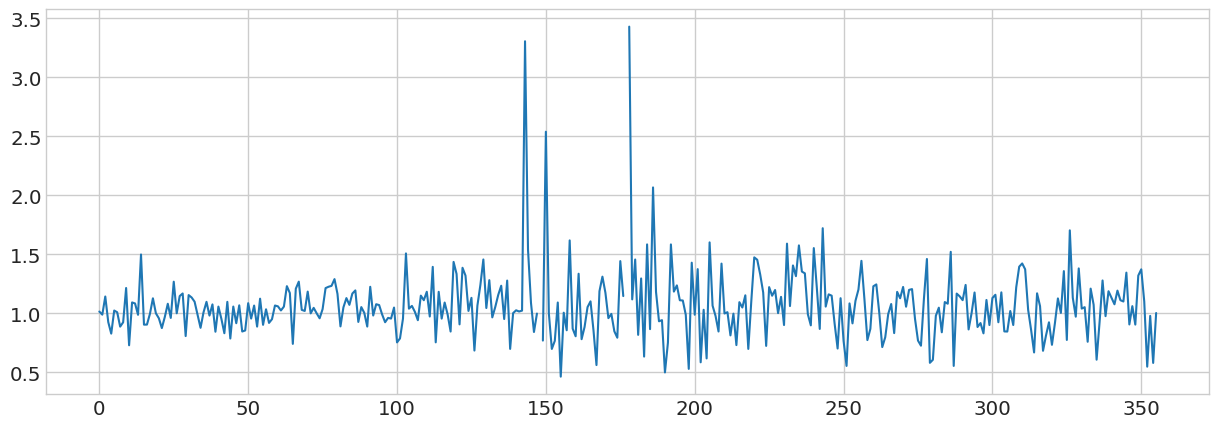

In [113]:
# let see how to ratio over the year using Pandas plot function
dfr['ratio'].plot()

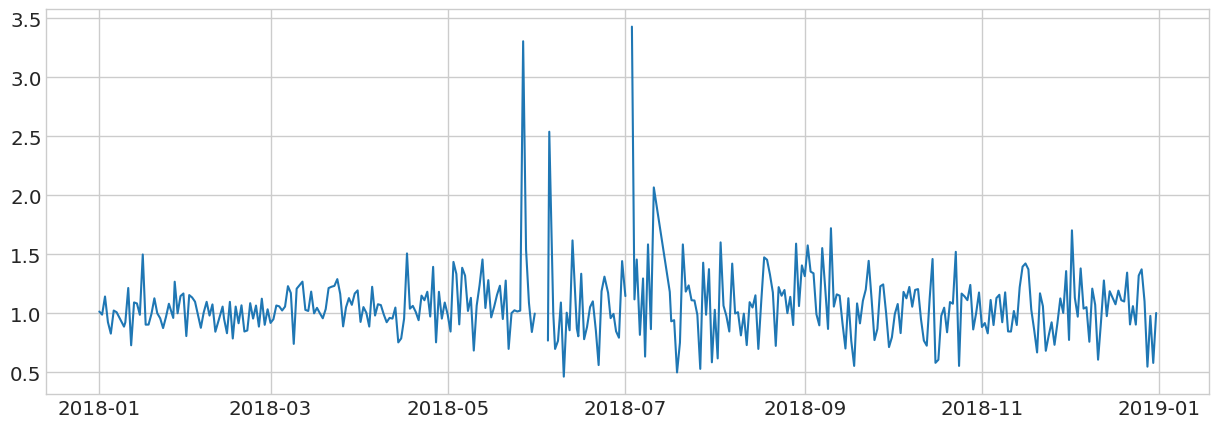

In [114]:
# or let see the day and with ratio
plt.plot(dfr.date, dfr.ratio)

**How did I see this?**

- it looks like a soundwave than supposedly a concensus or at least a trend of relation of peak-traffic hours to observed PM<sub>2.5</sub>
- traffic changes during the peak hours produced a mix trend to PM<sub>2.5</sub>
- let see if we can get something useful out of this

In [115]:
# high level summary with all non-empty values
dfr['ratio'].dropna().mean(), dfr['ratio'].dropna().std()

(np.float64(1.066584998103215), np.float64(0.2964620312841666))

Text(0.5, 0, 'Peak hours/ Nonpeak hours')

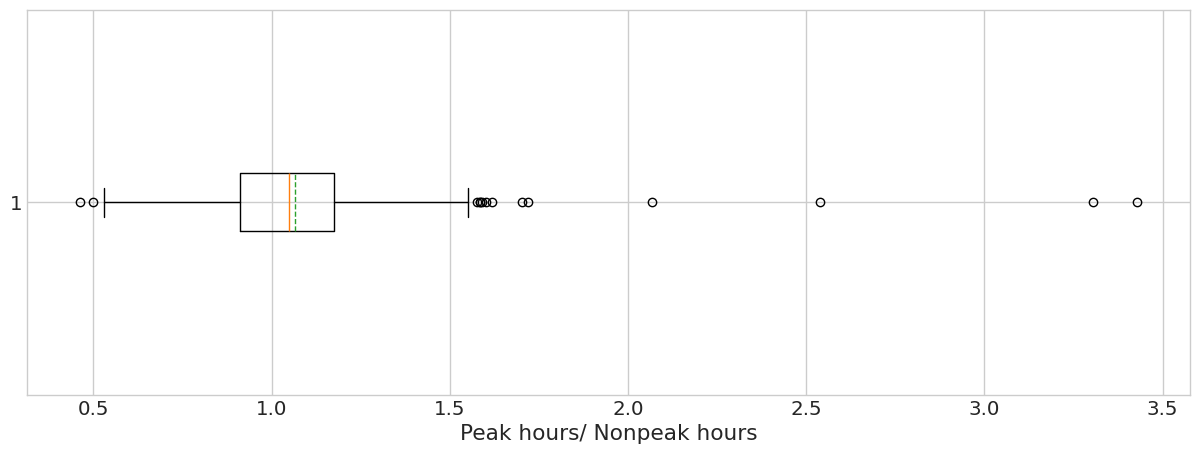

In [116]:
# Boxplot is a good choice for a summary of a collection
plt.boxplot(x=dfr['ratio'].dropna().values, vert=False, meanline=True, showmeans=True)
plt.xlabel('Peak hours/ Nonpeak hours')

[Wanted to change box look? check out here](https://matplotlib.org/3.1.0/gallery/statistics/boxplot.html)

In [117]:
# let create function to get more detail on the box plot\
def get_stats(df, col_name='ratio'):
    Q1 =  df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    stats = df[(df[col_name] > Q1-1.5*IQR ) | (df[col_name] < Q3+1.5*IQR)][col_name].describe()
    return stats

In [118]:
# let see what we get
stat = get_stats(dfr)
stat

count    354.000000
mean       1.066585
std        0.296462
min        0.463128
25%        0.911838
50%        1.047990
75%        1.175505
max        3.428571
Name: ratio, dtype: float64

In [119]:
stat

count    354.000000
mean       1.066585
std        0.296462
min        0.463128
25%        0.911838
50%        1.047990
75%        1.175505
max        3.428571
Name: ratio, dtype: float64

In [120]:
# and make text to print out the info
s_text = f'Mean: {stat["mean"]:.02f} \nSD: {stat["std"]:0.2f} \nMedian: {stat["50%"]:.02f}'
s_text

'Mean: 1.07 \nSD: 0.30 \nMedian: 1.05'

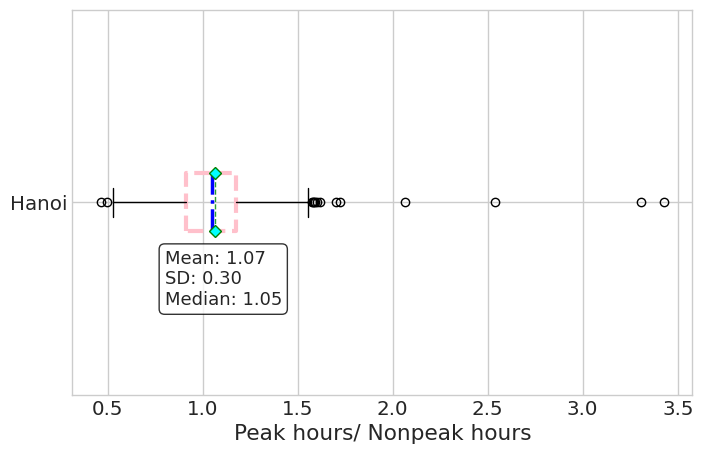

In [121]:
# we can make the plot really good looking

boxprops = dict(linestyle='--', linewidth=3, color='pink')
medianprops = dict(linestyle='-.', linewidth=2.5, color='blue')
meanpointprops = dict(marker='D', markeredgecolor='green',
                      markerfacecolor='cyan')
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8)

plt.figure(figsize=(8,5))
plt.boxplot(x=dfr['ratio'].dropna().values,
            vert=False, 
            meanline=True, showmeans=True, 
            boxprops=boxprops,
            medianprops=medianprops,
            meanprops = meanpointprops
           )
plt.xlabel('Peak hours/ Nonpeak hours')
ax = plt.gca()
ax.set_yticklabels(['Hanoi'])
plt.annotate(s_text, xy=(0.8, 0.8), xycoords="data", 
             bbox=bbox_props, size=13, ha="left", va="center");

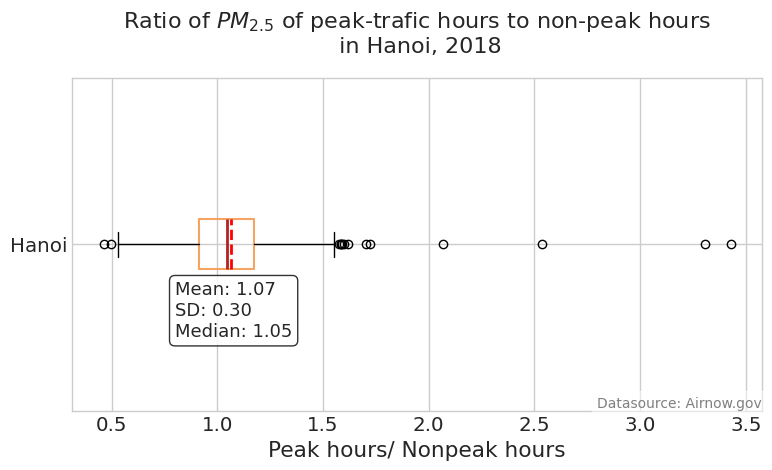

In [122]:
# or good looking and professional

boxprops = dict(linewidth=1.5, color='sandybrown')
medianprops = dict(linewidth=2, color='firebrick')
meanpointprops = dict(linewidth=2, color='red')
plt.figure(figsize=(8,5))
plt.boxplot(x=dfr['ratio'].dropna().values,
            vert=False, 
            meanline=True, showmeans=True, 
            boxprops=boxprops,
            medianprops=medianprops,
            meanprops = meanpointprops
           )
plt.xlabel('Peak hours/ Nonpeak hours')
ax = plt.gca()
ax.set_yticklabels(['Hanoi'])
plt.annotate(s_text, xy=(0.8, 0.8), xycoords="data", bbox=bbox_props, size=13, ha="left", va="center");
plt.title('Ratio of $PM_{2.5}$ of peak-trafic hours to non-peak hours\n in Hanoi, 2018', y=1.05, fontsize=16)
plt.text(1,0,'Datasource: Airnow.gov', 
         transform=ax.transAxes, 
         va='bottom', ha='right', fontsize=10, 
         color='gray', bbox={'facecolor': 'white', 'edgecolor': 'white', 'alpha':0.5})
plt.tight_layout()
plt.savefig('img/2020Jul-peakhours.png', dpi=120)

**Questions**: Are PM<sub>2.5</sub> changed with traffic peaks (during the day?)
- very slightly, and not statistically significant to draw conclusion between traffic hours and PM<sub>2.5</sub> increment
- from the graph above, 5-7% increment in the ratio of peak traffic hours to non-peak hour; however, the uncertain is high with SD=0.3 (or 30%)
- this outcome does not support the statement *traffic show no different in PM<sub>2.5</sub>*, but it woud inline with this statement **no statistical significance in peak-hour trafic in urban environment of  PM<sub>2.5</sub> in compared to non-peak hours** (sorry for a long message)
- another message like this **peak-hour traffic is more probable with increment of PM<sub>2.5</sub> in Hanoi, an analyze from Github shown.** is also defensible

## Is PM<sub>2.5</sub> changed in weekdays vs. weekends?
- let try to find answer (or the lack thereof) to the question above, the approach is the same

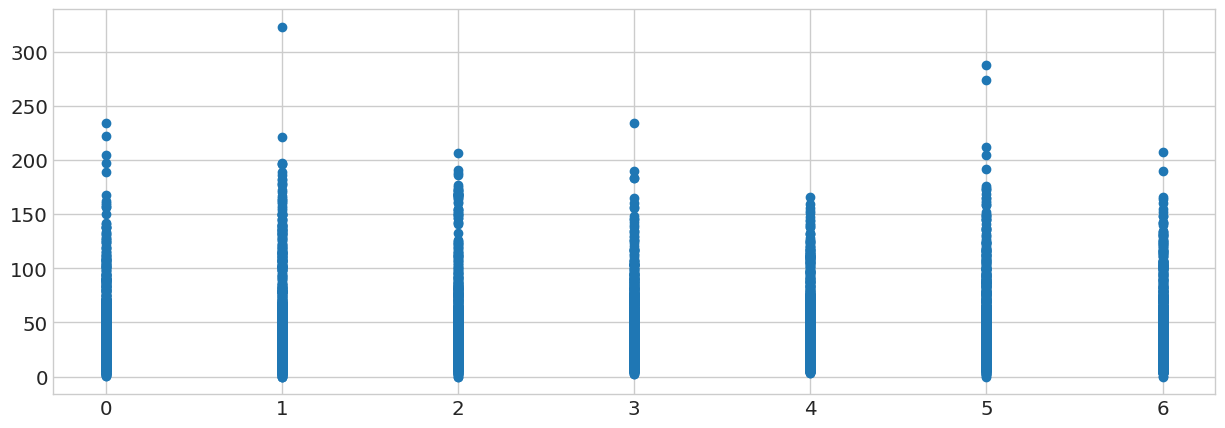

In [123]:
# first let a have a quick look how the PM2.5 look like for each in week, 0 is Monday, 6 is Sunday
plt.scatter(df.index.dayofweek, df.pm25);

In [124]:
# now let cut DataFrame into 52/53 week a year using weekofyear attribute
dfd = df.resample('1D').mean() # calculate daily average concentration (so the collection has 365 elements)
week_numbers = dfd.index.isocalendar().week
dfw = [group for _ , group in dfd.groupby(week_numbers)]
dfw[1]

,pm25
Date (LT),
2018-01-08,NaN
2018-01-09,42.300000
2018-01-10,41.183333
2018-01-11,52.950000
2018-01-12,63.837500
2018-01-13,91.204348
2018-01-14,114.762500


Next:
- use `weekofday` attribute (there many useful attributes with `Pandas DateTime` Objects) to yield an integer from 0 to 6, with **0 is Monday** and **6 is Sunday**

In [125]:
# define peak hours. PM2.5 reported with the timestamp of the end of period, so at PM2.5 at 9AM is measured from 8-9
week_ends = [5,6]
data= dfw[1] # take one instance for a test-drive
weekdays = data.groupby(data.index.dayofweek).filter(lambda ele: ele.index.dayofweek not in week_ends)
weekends = data.groupby(data.index.dayofweek).filter(lambda ele: ele.index.dayofweek in week_ends)

In [126]:
# let see how weekdays and weekends look like
weekdays

,pm25
Date (LT),
2018-01-08,NaN
2018-01-09,42.300000
2018-01-10,41.183333
2018-01-11,52.950000
2018-01-12,63.837500


In [127]:
weekends

,pm25
Date (LT),
2018-01-13,91.204348
2018-01-14,114.762500


In [128]:
# and modify a function earlier for this set
def cal_ratio_week(data): 
    week_ends = [5,6]
    weekdays = data.groupby(data.index.dayofweek).filter(lambda ele: ele.index.dayofweek not in week_ends)
    weekends = data.groupby(data.index.dayofweek).filter(lambda ele: ele.index.dayofweek in week_ends)
    date_ = data.index[-1] # take the last instance, very like this a Sunday
    if weekdays.isnull().sum().pm25 <2 and weekends.isnull().sum().pm25 <1:
        ratio = weekends.mean()/weekdays.mean()   
        output = {'date': date_, 'ratio': ratio.pm25}
    else:
        output = {'date': date_, 'ratio': 0}
    return output

In [129]:
# here we work through each day of the year, and yield the output to a list name ratios
week_ratios = list()
for i, data in enumerate(dfw):
    try:
        week_ratios.append(cal_ratio_week(data))
    except Exception as e:
        print(data)
        print(i,e)
        continue

                  pm25
Date (LT)             
2018-01-01   92.373913
2018-01-02  156.020833
2018-01-03   94.995833
2018-01-04   76.527273
2018-01-05   66.666667
2018-01-06   44.256522
2018-01-07   59.688889
2018-12-31   22.708333
2019-01-01   37.000000
0 The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


In [130]:
# one exception showed up, I will ignore for now

In [131]:
dfrw = pd.DataFrame.from_dict(week_ratios)
dfrw.head()

,date,ratio
0,2018-01-14,2.056883
1,2018-01-21,0.585041
2,2018-01-28,0.522676
3,2018-02-04,1.071958
4,2018-02-11,0.000000


<Axes: >

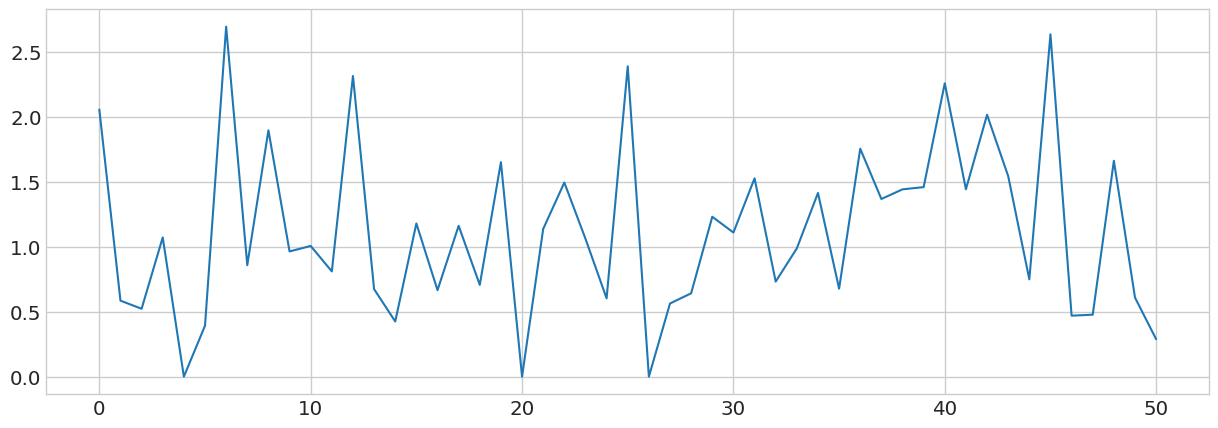

In [132]:
dfrw['ratio'].plot()

In [133]:
# well, there is few weeks that ratio is fixed as zero, we need to remove them
dfrw2 = dfrw.query('ratio!=0')

<Axes: >

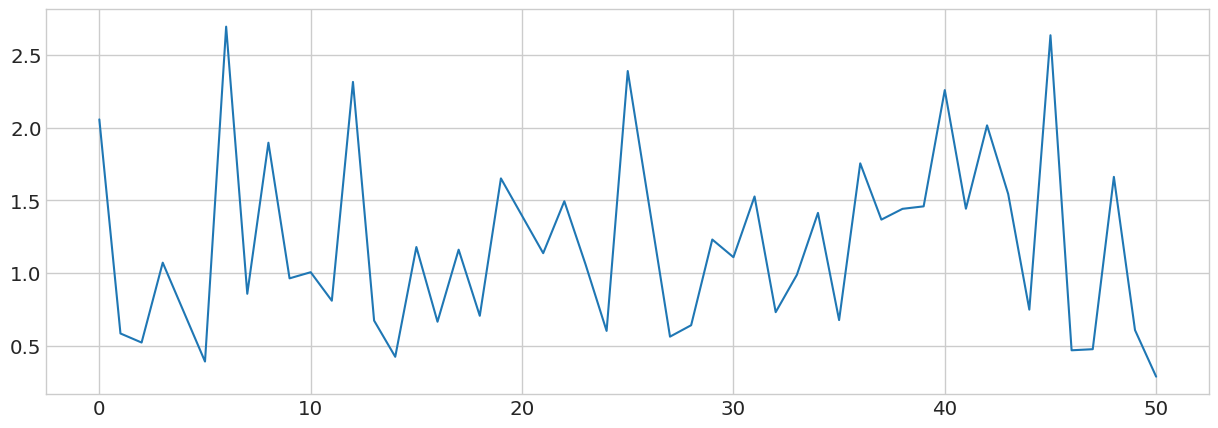

In [134]:
dfrw2['ratio'].plot()

**uhm, wait what?**

- yes, we have another a mix trend between weekdays and weekends, 
- it seems more weekends observing higher PM<sub>2.5</sub> concentration, which is *in disagreement* with the question being asked.

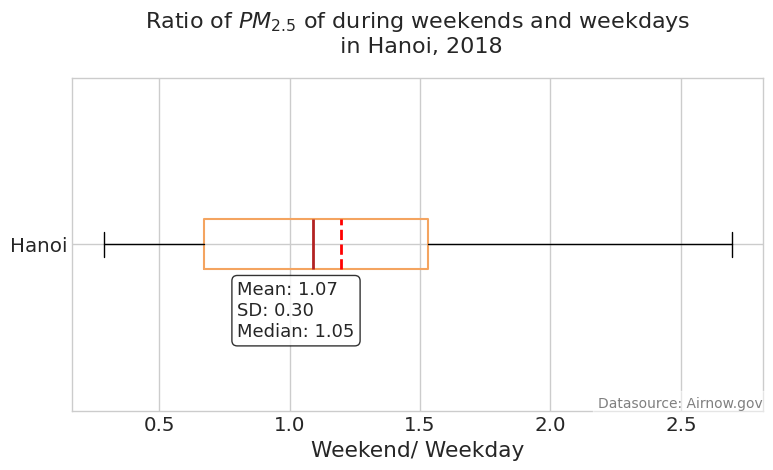

In [135]:
wstat = get_stats(dfrw2)
w_text = f'Mean: {wstat["mean"]:.02f} \nSD: {wstat["std"]:0.2f} \nMedian: {wstat["50%"]:.02f}'
# or good looking and professional

boxprops = dict(linewidth=1.5, color='sandybrown')
medianprops = dict(linewidth=2, color='firebrick')
meanpointprops = dict(linewidth=2, color='red')
plt.figure(figsize=(8,5))

plt.boxplot(x=dfrw2['ratio'].values,
            vert=False, 
            meanline=True, showmeans=True, 
            boxprops=boxprops,
            medianprops=medianprops,
            meanprops = meanpointprops
           )
plt.xlabel('Weekend/ Weekday')
ax = plt.gca()
ax.set_yticklabels(['Hanoi'])
plt.annotate(s_text, xy=(0.8, 0.8), xycoords="data", bbox=bbox_props, size=13, ha="left", va="center");
plt.title('Ratio of $PM_{2.5}$ of during weekends and weekdays\n in Hanoi, 2018', y=1.05, fontsize=16)
plt.text(1,0,'Datasource: Airnow.gov', 
         transform=ax.transAxes, 
         va='bottom', ha='right', fontsize=10, 
         color='gray', bbox={'facecolor': 'white', 'edgecolor': 'white', 'alpha':0.5})
plt.tight_layout()
plt.savefig('img/2020Jul-weeks.png', dpi=120)

**what? the PM<sub>2.5</sub> in weekends is even higher than weekdays in Hanoi, 2018?**

- yes, but is NOT easy to defense a **is** statement, it is more likey to interpret as **more probable** (having a higher chance)
- but it is not seem right or make sense (and I have, and having the same thought as well)
- if we assume *PM<sub>2.5</sub> is produced prominantly by traffic means that using by commutters and the time delay between source to PM<sub>2.5</sub> is within a few hours* then you have a solid case that there is something not right about the outcome. Now, if we look back the our assumption, there is more lot of holes and some of them are weak, or even not validable
- one take away is correlation with time is very easy to get the data ready, but the outcome is on shaky ground when the relation or causation is not clear or mixed.

## 3. What did PM<sub>2.5</sub> change with month in 2018?

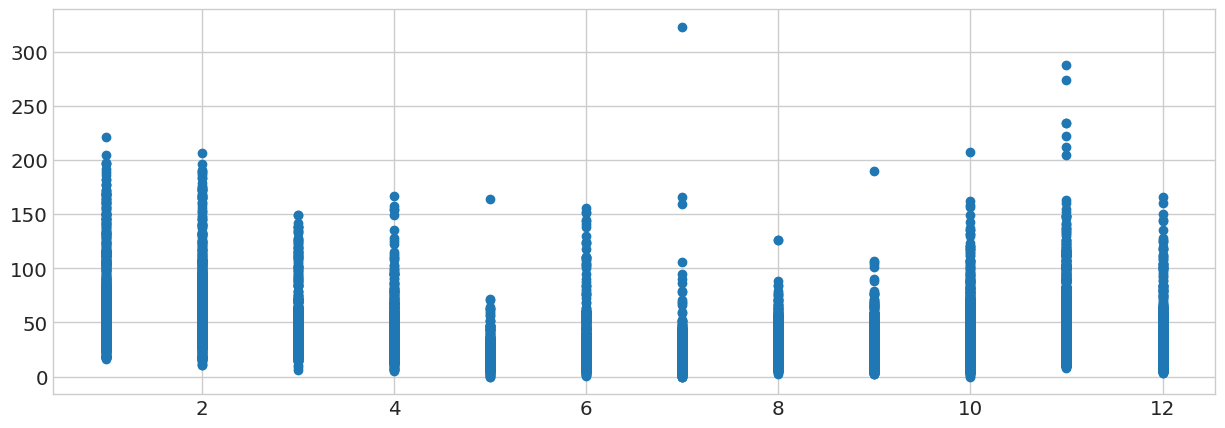

In [136]:
# let a quick look at each month
plt.scatter(df.index.month, df.pm25);

> yay, there is some difference there!
- PM<sub>2.5</sub> in winter time in Hanoi (November to February) is higher than summer time (May to August)
- June in Hanoi is an exception. The higher value is contributed maintly by biomass burning (rice straw) from suburbane and neighering province of Hanoi.
- if you want try make the summary with `boxplot` then it is good choice, but I will introduce another type of plot called `violinplot` by `seaborn`

In [137]:
dfm = df.groupby(df.index.month)

In [138]:
mean_ = dfm.mean().pm25.values
std_ = dfm.std().pm25.values

<ErrorbarContainer object of 3 artists>

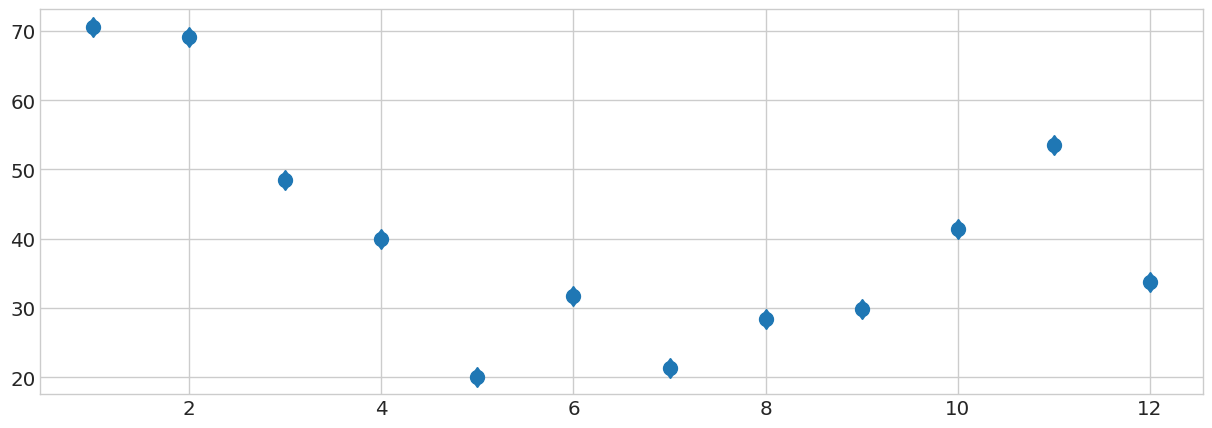

In [139]:
plt.errorbar(x=dfm.mean().index, y=dfm.mean().pm25, yerr=dfm.std().pm25, 
             uplims=True, lolims=True,
            ls='', marker='o', markersize=10, capsize=5)

In [140]:
# this libary help you pick up the name from number
import calendar

In [141]:
month = list(set(df.index.month))
month_name = [calendar.month_name[x] for x in month]
month_name

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

/tmp/ipykernel_4998/2845658585.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x=list(dfm.mean().index), y=dfm.mean().pm25, yerr=dfm.std().pm25,


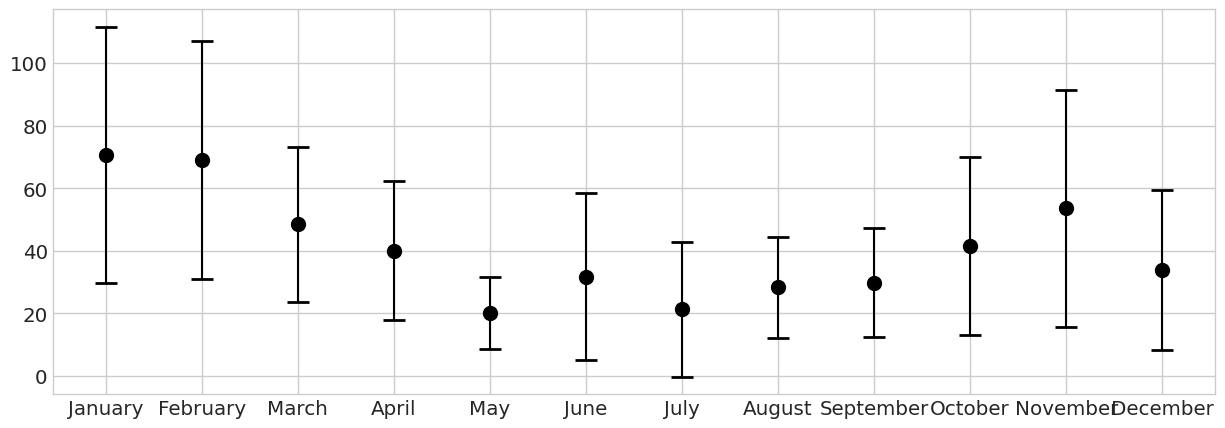

In [142]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15,5))
plt.errorbar(x=list(dfm.mean().index), y=dfm.mean().pm25, yerr=dfm.std().pm25,
            fmt='o', capsize=8, capthick=2, color='black',
            marker='o', markersize=10)
plt.xticks(list(dfm.mean().index))
ax = plt.gca()
ticks = ax.set_xticklabels(month_name);
# ax.set_xticklabels(even_month)

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_4998/1936670398.py:9: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Raw Conc., $\mu g/m^3$')
/tmp/ipykernel_4998/1936670398.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x=list(dfm.mean().index), y=dfm.mean().pm25, yerr=dfm.std().pm25,


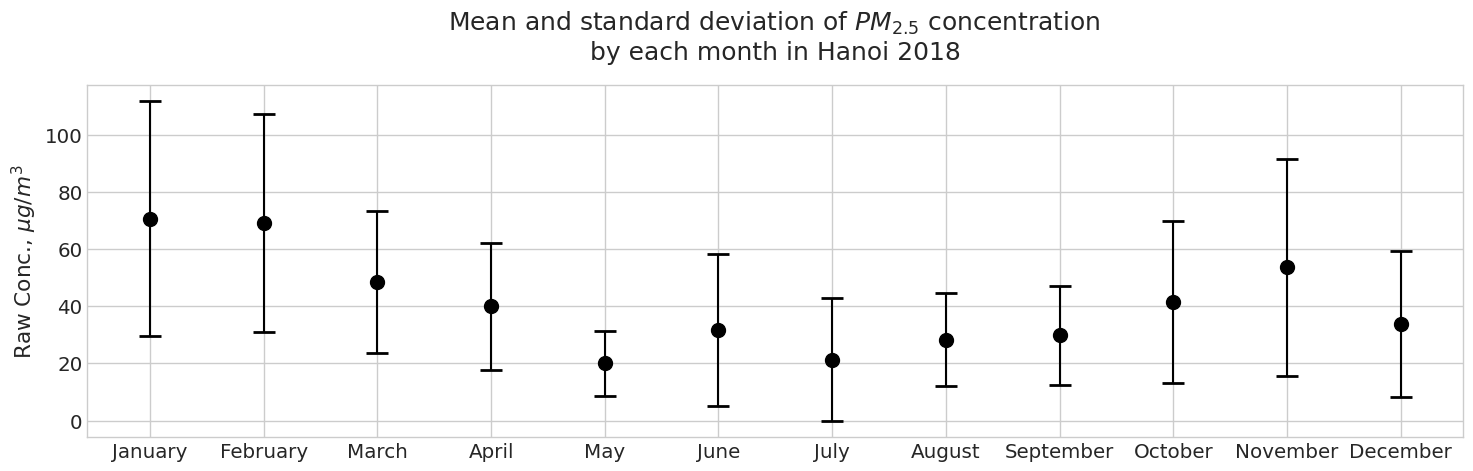

In [143]:

# plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,5))
plt.errorbar(x=list(dfm.mean().index), y=dfm.mean().pm25, yerr=dfm.std().pm25,
            fmt='o', capsize=8, capthick=2, color='black',
            marker='o', markersize=10)
plt.xticks(list(dfm.mean().index))
ax = plt.gca()
ax.set_xticklabels(month_name);
ax.set_ylabel('Raw Conc., $\mu g/m^3$')
ax.set_title('Mean and standard deviation of $PM_{2.5}$ concentration \nby each month in Hanoi 2018', y=1.05, fontsize=18)
# ax.set_xticklabels(even_month)
plt.tight_layout()

/home/hai/ml-env/air-quality-prediction/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 61.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/hai/ml-env/air-quality-prediction/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/hai/ml-env/air-quality-prediction/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/hai/ml-env/air-quality-prediction/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 75.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

<Axes: xlabel='Date (LT)', ylabel='pm25'>

/home/hai/ml-env/air-quality-prediction/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/hai/ml-env/air-quality-prediction/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 59.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/hai/ml-env/air-quality-prediction/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 59.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/hai/ml-env/air-quality-prediction/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

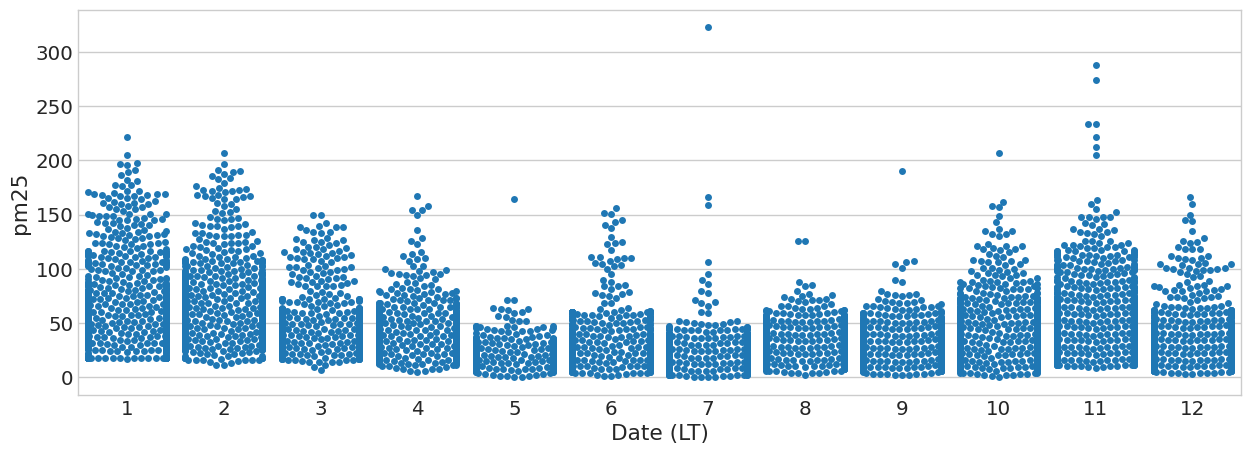

In [144]:
# this would like a longer time (15seconds on my computer)
# you plot almost every points 
sns.swarmplot(data=df, x=df.index.month, y='pm25')

<Axes: xlabel='Date (LT)', ylabel='pm25'>

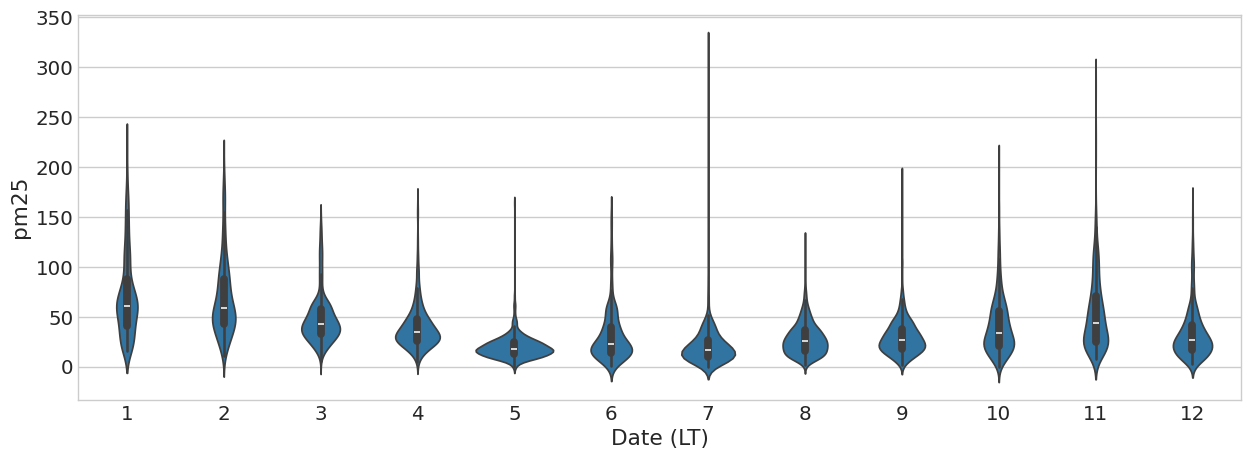

In [145]:
# there is not groupby function, but underlying seaborn carries out it 
sns.violinplot(data=df, x=df.index.month, y='pm25',
              )

/tmp/ipykernel_4998/2234169707.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_name);


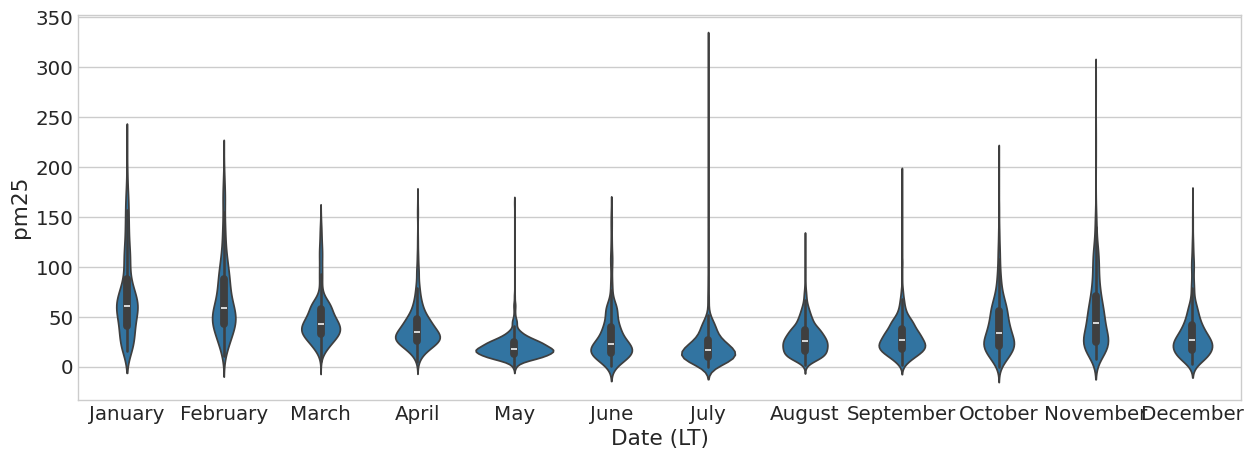

In [146]:
# now you see the powwer of seaborn
plt.figure(figsize=(15,5))
ax = sns.violinplot(data=df, x=df.index.month, y='pm25')
ax.set_xticklabels(month_name);

In [147]:
import numpy as np
mean_ = [round(x,2) for x in mean_]
std_ = [round(x,2) for x in std_]
data = np.array([mean_, std_])

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_4998/1588273164.py:9: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Raw Conc.,$\mu g/m^3$')


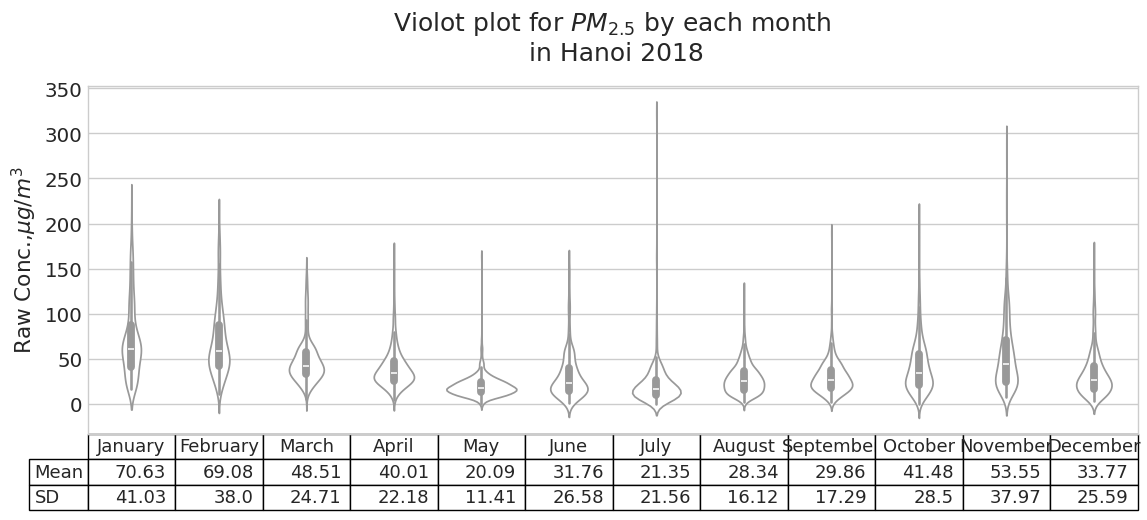

In [148]:
plt.figure(figsize=(15,6))
sns.violinplot(data=df, x=df.index.month, y='pm25', color='white')
plt.subplots_adjust(left=0.2, bottom=0.5)
ax = plt.gca()
# for ax in grid.axes.flatten():
#     ax.collections[0].set_edgecolor('black')
ax.set_xticks([])
ax.set_xlabel('')
ax.set_ylabel('Raw Conc.,$\mu g/m^3$')
ax.set_title('Violot plot for $PM_{2.5}$ by each month\n in Hanoi 2018', y=1.05, fontsize=18)
the_table = plt.table(
    cellText=data,
    colLabels=month_name,
    rowLabels=['Mean', 'SD'],
    loc='bottom')
the_table.auto_set_font_size(False)
the_table.set_fontsize(13)
# the_table.scale(1,1.5)
plt.subplots_adjust(left=0.2, bottom=0.3)
# plt.subplots_adjust(left=0.2, bottom=0.9)

[Wanted to change edge color of the violot plots, check it here](https://stackoverflow.com/questions/49926147/how-to-modify-edge-color-of-violinplot-using-seaborn)

In [149]:
# if you want to reset any style used to the default one
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)

In [150]:
# similar to the single chart above, but now you call it in with a function
def plot_month_data(ax):
    ax.errorbar(x=list(dfm.mean().index), y=dfm.mean().pm25, yerr=dfm.std().pm25,
                fmt='o', capsize=8, capthick=2, color='black',
                marker='o', markersize=10)
    ax = plt.gca()
    ax.set_ylabel('Raw Conc., $\mu g/m^3$')
    ax.set_title('Mean and errors')
    return ax

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_4998/3162325900.py:7: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Raw Conc., $\mu g/m^3$')


In [151]:
# similarly with violin plot
def plot_month_summary(ax):
    sns.violinplot(data=df, x=df.index.month, y='pm25', color='white')
    plt.subplots_adjust(left=0.2, bottom=0.5)
    ax = plt.gca()
    ax.set_xticks([])
    ax.set_xlabel('')
    ax.set_ylabel('Raw Conc.,$\mu g/m^3$')
    month_name_abbr = [month[:3] for month in month_name]
    the_table = plt.table(
        cellText=data,
        colLabels=month_name_abbr,
        rowLabels=['Mean', 'SD'],
        loc='bottom')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(10)
    return ax

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_4998/197102616.py:8: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Raw Conc.,$\mu g/m^3$')


In [152]:
# so now we want to bring 4 plot together, and the most fexlible approach (and complicated one) is using gridspec
import matplotlib.gridspec as gridspec

/tmp/ipykernel_4998/3162325900.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(x=list(dfm.mean().index), y=dfm.mean().pm25, yerr=dfm.std().pm25,


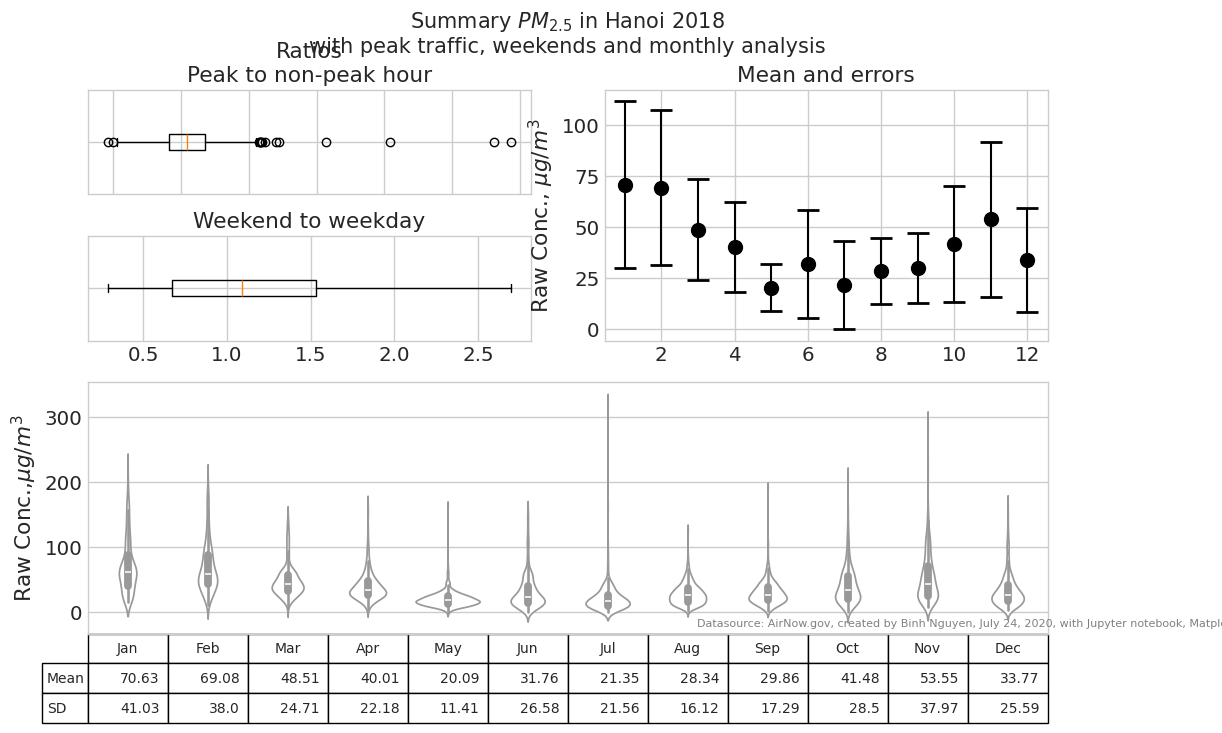

In [153]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(4, 4, hspace=0.4, wspace=0.4)
ax1 = fig.add_subplot(gs[0, 0:2])
ax1.set_title('Ratios\nPeak to non-peak hour')
ax1.boxplot(x=dfr['ratio'].dropna().values,
            vert=False)
ax1.set_xticklabels([])
ax1.set_yticklabels('', )

ax2 = fig.add_subplot(gs[1, 0:2])
ax2.boxplot(x=dfrw2['ratio'].dropna().values,
            vert=False)
ax2.set_title('Weekend to weekday')
ax2.set_yticklabels('')
ax3 = fig.add_subplot(gs[0:2, 2:4])
plot_month_data(ax3)

# axy = fig.add_subplot(gs[0, 1])
axz = fig.add_subplot(gs[2:, :])
plot_month_summary(axz)
fig.suptitle('Summary $PM_{2.5}$ in Hanoi 2018\nwith peak traffic, weekends and monthly analysis', fontsize=15)
plt.text(s='Datasource: AirNow.gov, created by Binh Nguyen, July 24, 2020, with Jupyter notebook, Matplotlib',x=0.9,y=-.21, transform=ax.transAxes, ha='right', color='gray', fontsize=8)
# fig.tight_layout(pad=1)
plt.subplots_adjust(left=0.1, bottom=0.2)
plt.savefig('img/2020Jul_pm25_time.png', dpi=120)

# Concluding notes

1. Quite lot of stuffs to unpack here. For the ratio of traffic load (with a proxy is the hour) is shown **none to very week correlation with observed PM<sub>2.5</sub> concentration**

2. The variation with months is more pronounced with a higher concentration in the winter, and almost half in the summer (ball part).

3. What is the underlying factor that changed the PM<sub>2.5</sub> for each month. We will look into meterological data next.

4. Python and the open source is awesome, though to get here does require time and concentration, energy 

5. Here is a [recent study (Dhammapala, 2019)](https://doi.org/10.1016/j.atmosenv.2019.05.070) looked into PM<sub>2.5</sub> variation using the same source of data 

# Analysis of Means (ANOM)
In this section, we will perform an Analysis of Means (ANOM) to statistically compare the monthly mean PM2.5 concentrations against the overall annual mean. This helps identify months with significantly higher or lower pollution levels.

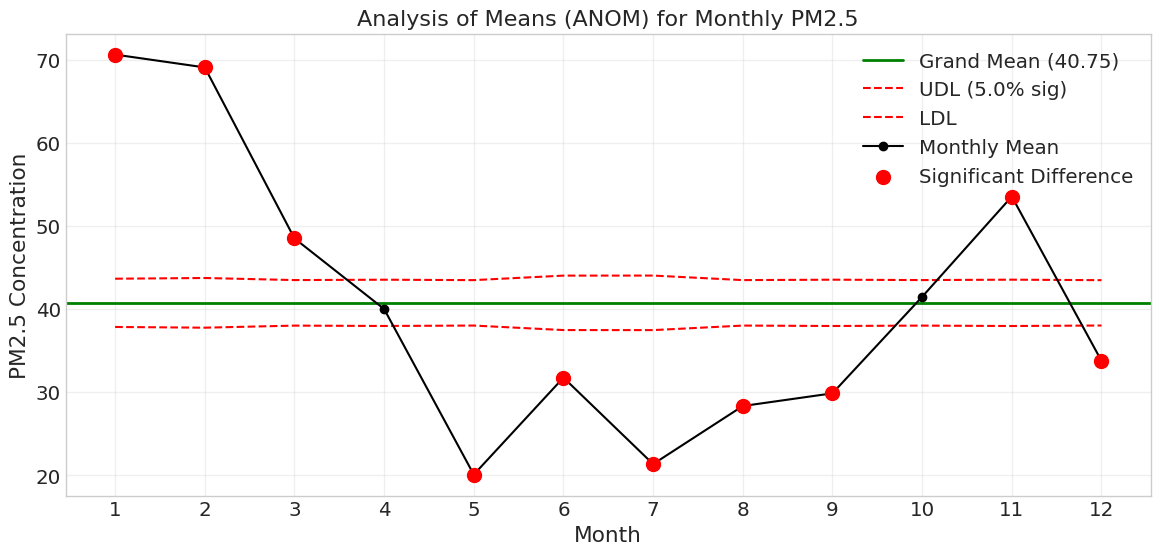

,mean,count,std,udl,ldl
Date (LT),,,,,
1,70.626998,663,41.026764,43.655288,37.849229
2,69.082803,628,37.996438,43.742015,37.762503
3,48.509362,737,24.714131,43.492123,38.012394
4,40.008799,716,22.184596,43.535926,37.968592
5,20.085270,740,11.411509,43.486014,38.018504
6,31.755660,530,26.584656,44.027730,37.476788
7,21.348485,528,21.562489,44.034356,37.470162
8,28.336942,739,16.120696,43.488046,38.016472
9,29.864336,715,17.287479,43.538058,37.966459


In [154]:
# --- BẮT ĐẦU PHẦN ANOM (Analysis of Means) ---
import numpy as np
import scipy.stats as stats

def plot_anom_monthly(df, col_name='pm25', alpha=0.05):
    # 1. Chuẩn bị dữ liệu: Gom nhóm theo tháng
    groups = df.groupby(df.index.month)[col_name]
    summary = groups.agg(['mean', 'count', 'std'])
    
    # 2. Tính Grand Mean (Trung bình chung toàn bộ dữ liệu)
    grand_mean = df[col_name].mean()
    
    # 3. Tính toán giới hạn quyết định (Decision Limits)
    # Sử dụng Mean Square Error (MSE) từ ANOVA để ước lượng phương sai gộp
    # MSE = sum((ni - 1) * si^2) / (N - k)
    N = len(df) # Tổng số mẫu
    k = len(summary) # Số nhóm (12 tháng)
    mse = np.sum((summary['count'] - 1) * summary['std']**2) / (N - k)
    root_mse = np.sqrt(mse)
    
    # Tính bậc tự do
    df_error = N - k
    
    # Tính giá trị tới hạn (Critical value) từ phân phối t-student
    # Hiệu chỉnh Bonferroni cho so sánh đa biến (tùy chọn, ở đây dùng t cơ bản cho ANOM)
    # h = stats.t.ppf(1 - alpha / 2, df_error) # Cách đơn giản
    # Cách chính xác hơn cho ANOM dùng bảng Nelson, nhưng t-student là xấp xỉ tốt với N lớn
    h = stats.t.ppf(1 - alpha / (2 * k), df_error) # Có hiệu chỉnh Bonferroni để chặt chẽ hơn

    # Tính UDL (Upper Decision Limit) và LDL (Lower Decision Limit) cho từng tháng
    # Công thức: Grand Mean +/- h * sqrt(MSE) * sqrt((N-n)/(N*n))
    summary['udl'] = grand_mean + h * root_mse * np.sqrt((N - summary['count']) / (N * summary['count']))
    summary['ldl'] = grand_mean - h * root_mse * np.sqrt((N - summary['count']) / (N * summary['count']))
    
    # 4. Vẽ biểu đồ
    plt.figure(figsize=(14, 6))
    
    # Vẽ đường trung bình chung
    plt.axhline(y=grand_mean, color='green', linestyle='-', linewidth=2, label=f'Grand Mean ({grand_mean:.2f})')
    
    # Vẽ các giới hạn
    plt.plot(summary.index, summary['udl'], color='red', linestyle='--', label=f'UDL ({alpha*100}% sig)')
    plt.plot(summary.index, summary['ldl'], color='red', linestyle='--', label='LDL')
    
    # Vẽ trung bình các nhóm
    plt.plot(summary.index, summary['mean'], marker='o', color='black', linewidth=1.5, label='Monthly Mean')
    
    # Tô màu các điểm vượt ngưỡng
    outliers = summary[(summary['mean'] > summary['udl']) | (summary['mean'] < summary['ldl'])]
    plt.scatter(outliers.index, outliers['mean'], color='red', s=100, zorder=5, label='Significant Difference')

    plt.title('Analysis of Means (ANOM) for Monthly PM2.5', fontsize=16)
    plt.xlabel('Month')
    plt.ylabel('PM2.5 Concentration')
    plt.xticks(range(1, 13))
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return summary

# Gọi hàm
anom_results = plot_anom_monthly(df)
anom_results